# Анализ данных в задаче кредитного скоринга

**Данные**

Для выполнения этого задания вам понадобятся данные о кредитных историях клиентов одного из банков. Поля в предоставляемых данных имеют следующий смысл:

- LIMIT_BAL: размер кредитного лимита (в том числе и на семью клиента)

- SEX: пол клиента (1 = мужской, 2 = женский)

- EDUCATION: образование (0 = доктор, 1 = магистр; 2 = бакалавр; 3 = выпускник школы; 4 = начальное образование; 5= прочее; 6 = нет данных ).

- MARRIAGE: (0 = отказываюсь отвечать; 1 = замужем/женат; 2 = холост; 3 = нет данных).

- AGE: возраст в годах

- PAY_0 - PAY_6 : История прошлых платежей по кредиту. PAY_6 - платеж в апреле, ... Pay_0 - платеж в сентябре. Платеж = (0 = исправный платеж, 1=задержка в один месяц, 2=задержка в 2 месяца ...)

- BILL_AMT1 - BILL_AMT6: задолженность, BILL_AMT6 - на апрель, BILL_AMT1 - на сентябрь

- PAY_AMT1 - PAY_AMT6: сумма уплаченная в PAY_AMT6 - апреле, ..., PAY_AMT1 - сентябре

- default - индикатор невозврата денежных средств


**Задание**

1) Размер кредитного лимита (LIMIT_BAL). В двух группах, тех людей, кто вернул кредит (default = 0) и тех, кто его не вернул (default = 1) проверьте гипотезы: a) о равенстве медианных значений кредитного лимита с помощью подходящей интервальной оценки b) о равенстве распределений с помощью одного из подходящих непараметрических критериев проверки равенства средних. Значимы ли полученные результаты с практической точки зрения ?

2) Пол (SEX): Проверьте гипотезу о том, что гендерный состав группы людей вернувших и не вернувших кредит отличается. Хорошо, если вы предоставите несколько различных решений этой задачи (с помощью доверительного интервала и подходящего статистического критерия)

3) Образование (EDUCATION): Проверьте гипотезу о том, что образование не влияет на то, вернет ли человек долг. Предложите способ наглядного представления разницы в ожидаемых и наблюдаемых значениях количества человек вернувших и не вернувших долг. Например, составьте таблицу сопряженности "образование" на "возврат долга", где значением ячейки была бы разность между наблюдаемым и ожидаемым количеством человек. Как бы вы предложили модифицировать таблицу так, чтобы привести значения ячеек к одному масштабу не потеряв в интерпретируемости ? Наличие какого образования является наилучшим индикатором того, что человек отдаст долг? наоборот, не отдаст долг?

4) Семейное положение (MARRIAGE): Проверьте, как связан семейный статус с индикатором дефолта: нужно предложить меру, по которой можно измерить возможную связь этих переменных и посчитать ее значение.

5) Возраст (AGE): Относительно двух групп людей вернувших и не вернувших кредит проверьте следующие гипотезы: a) о равенстве медианных значений возрастов людей b) о равенстве распределений с помощью одного из подходящих непараметрических критериев проверки равенства средних. Значимы ли полученные результаты с практической точки зрения?

In [2]:
import numpy as np
import pandas as pd
from scipy import stats
import itertools
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
data = pd.read_csv("credit_card_default_analysis.csv", sep=",", header=0)
data.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
0,1,20000,2,2,1,24,2,2,0,0,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,0,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,0,0,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [3]:
data.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,0.356767,0.320033,0.304067,0.258767,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,0.760594,0.801727,0.790589,0.761113,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,0.000000,0.000000,0.000000,0.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,0.000000,0.000000,0.000000,0.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


In [10]:
data.shape

(30000, 25)

**Задание 1.** Размер кредитного лимита (LIMIT_BAL). В двух группах, тех людей, кто вернул кредит (default = 0) и тех, кто его не вернул (default = 1) проверьте гипотезы: a) о равенстве медианных значений кредитного лимита с помощью подходящей интервальной оценки b) о равенстве распределений с помощью одного из подходящих непараметрических критериев проверки равенства средних. Значимы ли полученные результаты с практической точки зрения ?

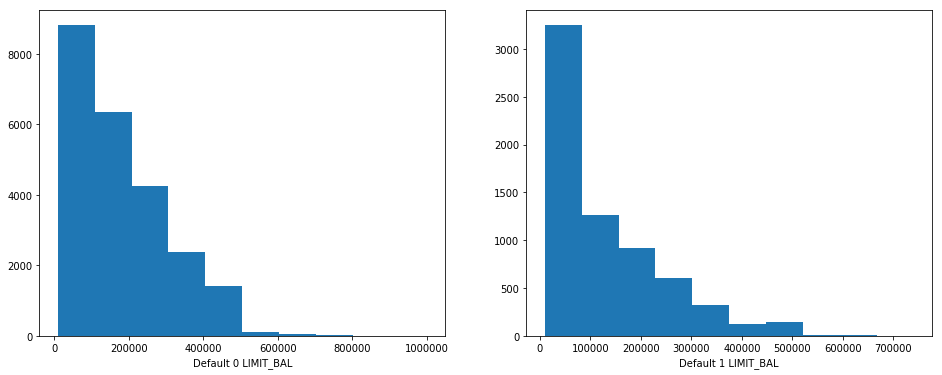

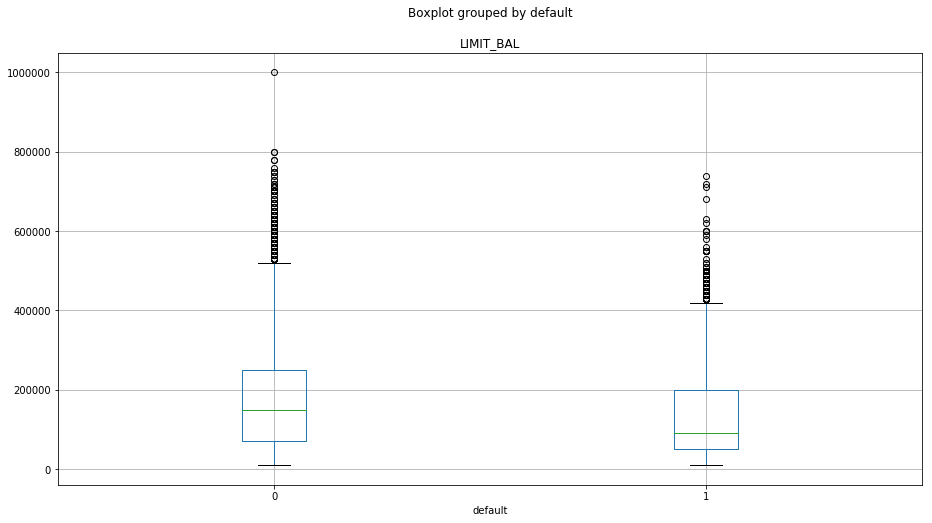

In [34]:
#Разделяем на две группы
default_0 = data[data['default'] == 0]
default_1 = data[data['default'] == 1]

default_0_lim = default_0["LIMIT_BAL"].values
default_1_lim = default_1["LIMIT_BAL"].values

#строим гистограммы и график

pylab.figure(figsize(16,6))
pylab.subplot(121)
pylab.xlabel("Default 0 LIMIT_BAL")
pylab.hist(default_0_lim, label="Default 0 limits")
pylab.subplot(122)
pylab.xlabel("Default 1 LIMIT_BAL")
pylab.hist(default_1_lim, label="Default 1 limits")

data.boxplot(column="LIMIT_BAL", by="default", figsize = (15,8))

pylab.show()


Из графиков видим, что распределения для групп (default 0) и (default 1) визуально похожи за исключением величины лимита по кредиту.

In [5]:
def get_bootstrap_samples(data, n_samples):
    data_length = len(data)
    indices = np.random.randint(0, data_length, (n_samples, data_length))
    return data[indices]

def stat_intervals(stat, alpha):
    boundaries = np.percentile(stat, [100 * alpha / 2., 100 * (1 - alpha / 2.)])
    return boundaries

def calculate_median_confidence_interval(data, samples_count = 1000, alpha = 0.05):
    median = np.median(data)
    medians = map(lambda samples_group: np.median(samples_group), get_bootstrap_samples(data, samples_count))
    confint = stat_intervals(medians, alpha)
    return (median, confint)

def compare_distributions(data1, data2, samples_count, alpha):
    median_deltas = map(
        lambda (s_median,d_median): s_median-d_median,
        zip(
            map(lambda samples_group: np.median(samples_group), get_bootstrap_samples(data1, samples_count)),
            map(lambda samples_group: np.median(samples_group), get_bootstrap_samples(data2, samples_count))
        )
    )
    return stat_intervals(median_deltas, alpha)

**Гипотеза а)**: о равенстве медианных значений кредитного лимита с помощью подходящей интервальной оценки. 

In [50]:
n = 1000
alpha = 0.05

default_0_lim_int = calculate_median_confidence_interval(default_1_lim, n, alpha)
default_1_lim_int = calculate_median_confidence_interval(default_0_lim, n, alpha)
median_delta_int = compare_distributions(default_0_lim, default_1_lim, n, alpha)

print u"Default 0 median: %.4f Доверительный интервал: %s" % default_0_lim_int
print u"Default 1 median: %.4f Доверительный интервал: %s" % default_1_lim_int

print u"Доверительный интервал для разности: %s " % median_delta_int

Default 0 median: 90000.0000 Доверительный интервал: [80000. 90000.]
Default 1 median: 150000.0000 Доверительный интервал: [150000. 150000.]
Доверительный интервал для разности: [60000. 70000.] 


Можем сделать вывод о том, кредитный лимит в группе default_0 значительно больше, чем в группе default_1. Иными словами, кредитный лимит значительно больше для группы вернувших кредит.

**Гипотеза b)**: о равенстве распределений с помощью одного из подходящих непараметрических критериев проверки равенства средних. Значимы ли полученные результаты с практической точки зрения?

Используем перестановочный критерий для несвязанных выборок. 

In [7]:
def permutation_t_stat_ind(sample1, sample2):
    return np.median(sample1) - np.median(sample2)

def get_random_combinations(n1, n2, max_combinations):
    index = range(n1 + n2)
    indices = set([tuple(index)])
    for i in range(max_combinations - 1):
        np.random.shuffle(index)
        indices.add(tuple(index))
    return [(index[:n1], index[n1:]) for index in indices]

def permutation_zero_dist_ind(sample1, sample2, max_combinations = None):
    joined_sample = np.hstack((sample1, sample2))
    n1 = len(sample1)
    n = len(joined_sample)
    if max_combinations:
        indices = get_random_combinations(n1, len(sample2), max_combinations)
    else:
        indices = [(list(index), filter(lambda i: i not in index, range(n))) \
                    for index in itertools.combinations(range(n), n1)]
    
    distr = [joined_sample[list(i[0])].mean() - joined_sample[list(i[1])].mean() \
             for i in indices]
    return distr

def permutation_test(sample1, sample2, max_permutations = None, alternative = 'two-sided'):
    if alternative not in ('two-sided', 'less', 'greater'):
        raise ValueError("alternative not recognized\n"
                         "should be 'two-sided', 'less' or 'greater'")
    
    t_stat = permutation_t_stat_ind(sample1, sample2)
    
    zero_distr = permutation_zero_dist_ind(sample1, sample2, max_permutations)
    
    if alternative == 'two-sided':
        return sum([1. if abs(x) >= abs(t_stat) else 0. for x in zero_distr]) / len(zero_distr)
    
    if alternative == 'less':
        return sum([1. if x <= t_stat else 0. for x in zero_distr]) / len(zero_distr)

    if alternative == 'greater':
        return sum([1. if x >= t_stat else 0. for x in zero_distr]) / len(zero_distr)

In [8]:
print "P-value: %.6f" %permutation_test(default_1_lim, default_0_lim, max_permutations=1000, alternative="two-sided")

P-value: 0.000000


Видим, что уровень значимости для непараметрическиого критерия намного меньше, чем 0.05 - мы уверенно отвергаем гипотезу о равенстве двух распределений. На практике это говорит о том, что банк намерен выдавать кредиты только надёжным заёмщикам.

**Задание 2)** Пол (SEX): Проверьте гипотезу о том, что гендерный состав группы людей вернувших и не вернувших кредит отличается. Хорошо, если вы предоставите несколько различных решений этой задачи (с помощью доверительного интервала и подходящего статистического критерия)

In [9]:
default_0_sex = default_0["SEX"].values
default_1_sex = default_1["SEX"].values

In [10]:
def proportions_confint_diff(first_vector, second_vector, alpha = 0.05):
    count1 = float(len(first_vector))
    count2 = float(len(second_vector))
    p1 = float(len(filter(lambda x: x == 1, first_vector)))/count1
    p2 = float(len(filter(lambda x: x == 1, second_vector)))/count2
    z = stats.norm.ppf(1. - alpha / 2.)

    left_boundary = (p1 - p2) - z * np.sqrt(p1 * (1. - p1)/ count1 + p2 * (1 - p2)/ count2)
    right_boundary = (p1 - p2) + z * np.sqrt(p1 * (1. - p1)/ count1 + p2 * (1 - p2)/ count2)
    
    return (left_boundary, right_boundary)

def proportions_diff_z_stat_ind(sample1, sample2):
    n1 = len(sample1)
    n2 = len(sample2)
    
    p1 = float(len(filter(lambda x: x == 1, sample1))) / n1
    p2 = float(len(filter(lambda x: x == 1, sample2))) / n2 
    P = float(p1*n1 + p2*n2) / (n1 + n2)
    
    return (p1 - p2) / np.sqrt(P * (1 - P) * (1. / n1 + 1. / n2))

def proportions_diff_z_test(sample1, sample2, alternative = 'two-sided'):
    z_stat = proportions_diff_z_stat_ind(sample1, sample2)
    if alternative not in ('two-sided', 'less', 'greater'):
        raise ValueError("alternative not recognized\n"
                         "should be 'two-sided', 'less' or 'greater'")
    
    if alternative == 'two-sided':
        return 2 * (1 - stats.norm.cdf(np.abs(z_stat)))
    
    if alternative == 'less':
        return stats.norm.cdf(z_stat)

    if alternative == 'greater':
        return 1 - stats.norm.cdf(z_stat) 


In [12]:
sex_table = pd.pivot_table(
    data[["SEX", "default", "LIMIT_BAL"]],
    values=["LIMIT_BAL"],
    index=["SEX"],
    columns=["default"],
    fill_value = 0,
    aggfunc='count')
sex_table

LIMIT_BAL      
default         0     1
SEX                    
1            9015  2873
2           14349  3763

Видим, что среди вернувших кредит женщин больше, чем мужчин. Но и среди невернувших кредит женщин также больше. Построим доверительный интервал для доли мужчин на основе z-критерия для двух независимых выборок.


In [13]:
print proportions_confint_diff(default_1_sex, default_0_sex)

(0.03363493274962867, 0.060548077974896725)


Видим, что доверительный интервал не содержит 0.0, а значит мы можем утверждать, что доля мужчин невернувших кредит больше, чем вернувших.

Проверим гипотезу H0: доля мужчин в выборках default_1 и default_0 равна, против двусторонней альтернативы: H1, что не равна.

Используем тот же z-критерий для двух независимых выборок:

In [14]:
pvalue = proportions_diff_z_test(default_1_sex, default_0_sex, alternative='two-sided')
print(pvalue)

4.472866521609831e-12


Уровень значимости намного меньше, чем 0.05, значит мы уверенно отвергаем нулевую гипотезу. Доли мужчин в среди вернувших и невернувших кредит не равны. Женщины чаще возвращают кредиты.  Поскольку доверительный интервал расположен близко к нулю, можно сделать вывод, что в практическом плане пол не имеет особого значения для решения задачи скоринга.

**Задание 3)** Образование (EDUCATION): Проверьте гипотезу о том, что образование не влияет на то, вернет ли человек долг. Предложите способ наглядного представления разницы в ожидаемых и наблюдаемых значениях количества человек вернувших и не вернувших долг. Например, составьте таблицу сопряженности "образование" на "возврат долга", где значением ячейки была бы разность между наблюдаемым и ожидаемым количеством человек. Как бы вы предложили модифицировать таблицу так, чтобы привести значения ячеек к одному масштабу не потеряв в интерпретируемости ? Наличие какого образования является наилучшим индикатором того, что человек отдаст долг? наоборот, не отдаст долг?

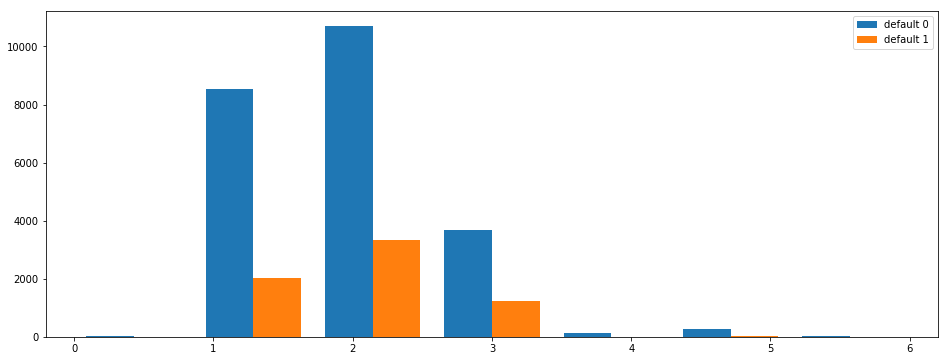

In [15]:
default_0_edu = default_0["EDUCATION"].values
default_1_edu = default_1["EDUCATION"].values

pylab.hist([default_0_edu, default_1_edu], 7, label = ["default 0", "default 1"])
pylab.legend()

In [16]:
edu_table = pd.pivot_table(
    data[["EDUCATION", "default", "LIMIT_BAL"]],
    values=["LIMIT_BAL"],
    index=["EDUCATION"],
    columns=["default"],
    fill_value = 0,
    aggfunc='count')

edu_table

LIMIT_BAL      
default           0     1
EDUCATION                
0                14     0
1              8549  2036
2             10700  3330
3              3680  1237
4               116     7
5               262    18
6                43     8

Очевидно, что среди клиентов банка с докторской степенью максимальный процент вернувших кредит, наименьший процент среди клиентов, имеющих образование бакалавра. 

**Задание 4)**. Семейное положение (MARRIAGE): Проверьте, как связан семейный статус с индикатором дефолта: нужно предложить меру, по которой можно измерить возможную связь этих переменных и посчитать ее значение.

In [18]:
marriage_table = pd.pivot_table(
    data[["MARRIAGE", "default", "LIMIT_BAL"]],
    values=["LIMIT_BAL"],
    index=["MARRIAGE"],
    columns=["default"],
    fill_value = 0,
    aggfunc='count')

marriage_table

LIMIT_BAL      
default          0     1
MARRIAGE                
0               49     5
1            10453  3206
2            12623  3341
3              239    84

Из таблицы видно, что категории 0 (отказываюсь отвечать) и 3 (нет данных) имеют соответственно минииальный и максимальный показатель соотношения вернувших и невернувших кредит. Но в абсолютных значениях, количество таких клиентов невелико. 

Применим критерий хи-квадрат:

In [19]:
marriage_matrix = marriage_table.values
marriage_matrix

array([[   49,     5],
       [10453,  3206],
       [12623,  3341],
       [  239,    84]], dtype=int64)

In [33]:
p = stats.chi2_contingency(marriage_matrix)[1]
print('p-value = {}'.format(p))

p-value = 8.82586245758e-08


Видим, что признак MARRIAGE несущественно влияет на возврат кредита. 

**Задание 5).** Возраст (AGE): Относительно двух групп людей вернувших и не вернувших кредит проверьте следующие гипотезы: a) о равенстве медианных значений возрастов людей b) о равенстве распределений с помощью одного из подходящих непараметрических критериев проверки равенства средних. Значимы ли полученные результаты с практической точки зрения?

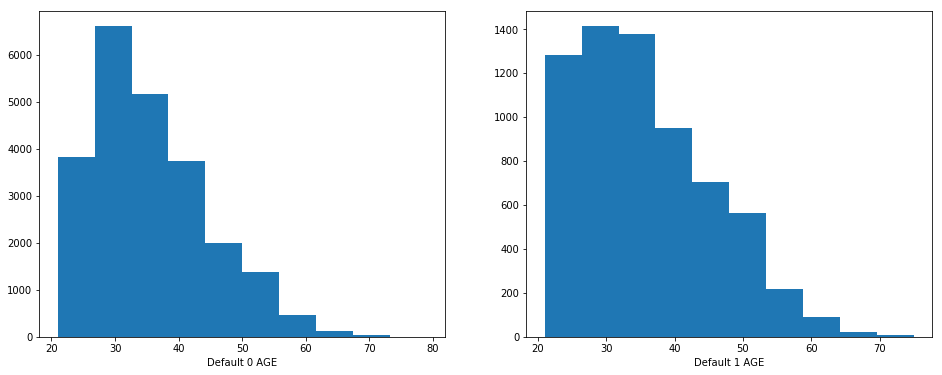

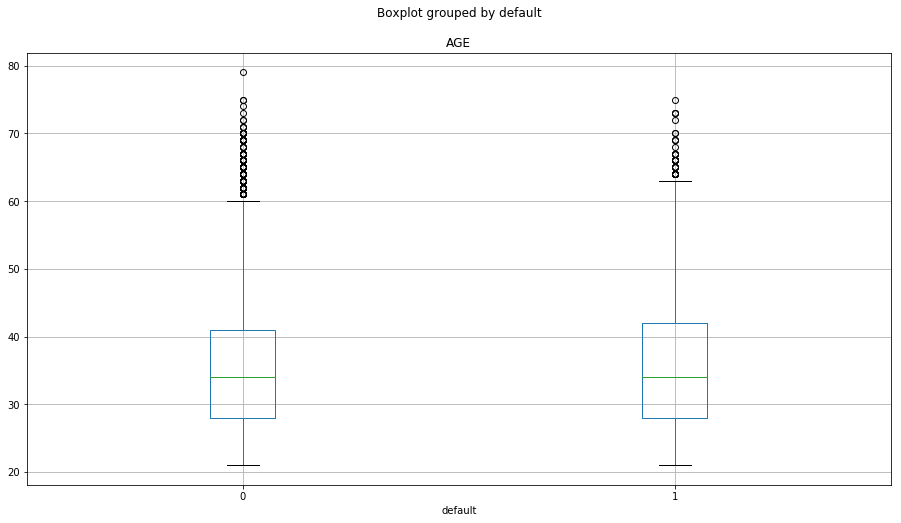

In [36]:
#Разделяем на две группы
#default_0 = data[data['default'] == 0]
#default_1 = data[data['default'] == 1]

default_0_age = default_0["AGE"].values
default_1_age = default_1["AGE"].values

#строим гистограммы и график

pylab.figure(figsize(16,6))
pylab.subplot(121)
pylab.xlabel("Default 0 AGE")
pylab.hist(default_0_age, label="Default 0 AGE")
pylab.subplot(122)
pylab.xlabel("Default 1 AGE")
pylab.hist(default_1_age, label="Default 1 AGE")

data.boxplot(column="AGE", by="default", figsize = (15,8))

pylab.show()

Визуально, медианные значения возрастов клиентов практически не отличаются.
Проверим гипотезу a: медианы значений возрастов равны.

In [38]:
default_0_age_int = calculate_median_confidence_interval(default_0_age, n, alpha)
default_1_age_int = calculate_median_confidence_interval(default_1_age, n, alpha)
median_delta_int = compare_distributions(default_0_age, default_1_age, n, alpha)

print u"Default 0 median: %.4f Доверительный интервал: %s" % default_0_age_int
print u"Default 1 median: %.4f Доверительный интервал: %s" % default_1_age_int

print u"Доверительный интервал для разности: %s " % median_delta_int


Default 0 median: 34.0000 Доверительный интервал: [34. 34.]
Default 1 median: 34.0000 Доверительный интервал: [34. 35.]
Доверительный интервал для разности: [-1.  0.] 


Вывод: Доверительный интервал для значений азницы возрастов двух групп содержит ноль - гипотеза о равенстве возрастов не отвергается.

Теперь проверим гипотезу b) о равенстве распределений с помощью одного из подходящих непараметрических критериев проверки равенства средних. Значимы ли полученные результаты с практической точки зрения?

Проверим гипотезу Н0: распределения возрастов в двух группах (вернувших и невернувших кредит) равны, против общей альтернативы.

Используя перестановочный критерий оценки получим:

In [43]:
print "p-value: {:.10f}".format(permutation_test(default_1_age, default_0_age, max_permutations=1000, alternative="two-sided"))

p-value: 1.0000000000


Гипотеза Н0 о равенстве распределений возрастов для двух групп не отвргается.

**ЗАКЛЮЧЕНИЕ:**

1) Кредитный лимит выше для клиентов, не допускавших просроченных платежей.

2) Доля мужчин, в группе невернувших кредит, выше. Можно утверждать, что женщины исправнее исполняют кредитные обязательства.

3) Уровень образования несущественно влияет на вероятность возврата кредита.

4) Клиенты состоящие в браке чаще исправно выплачивают кредиты.

5) Возраст выернувших и невернувших кредиты практически совпадает.
